In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv("car_sales_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [5]:
df.isnull()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2499995,False,False,False,False,False,False,False,False,False
2499996,False,False,False,False,False,False,False,False,False
2499997,False,False,False,False,False,False,False,False,False
2499998,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

In [7]:
df.shape

(2500000, 9)

In [8]:
df.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03
std,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03
min,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03
50%,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03
75%,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03
max,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03


In [9]:
df.dtypes

Date                  object
Salesperson           object
Customer Name         object
Car Make              object
Car Model             object
Car Year               int64
Sale Price             int64
Commission Rate      float64
Commission Earned    float64
dtype: object

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df['Month'] =df['Date'].dt.month
df['Year'] =df['Date'].dt.year

In [12]:
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby(['Month', 'Year'])['Sale Price'].sum()
max_sales_month = monthly_sales.idxmax()
print(max_sales_month)

(12, 2022)


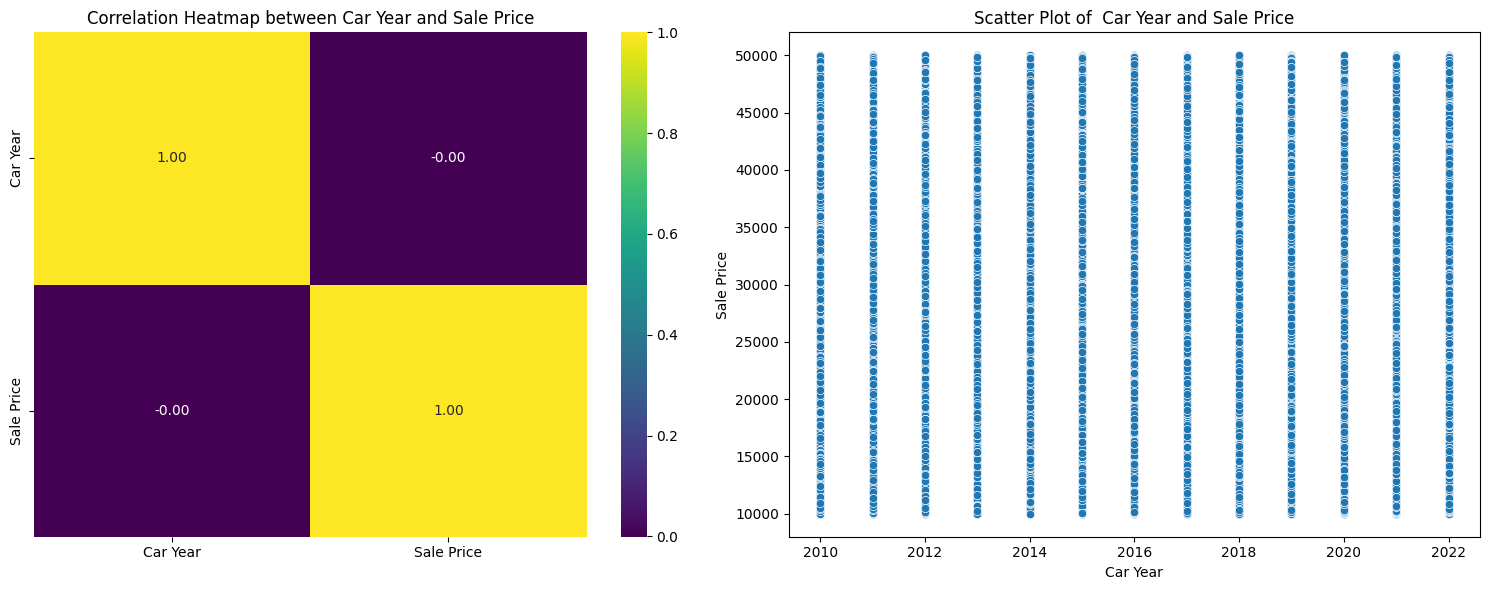

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(df[['Car Year', 'Sale Price']].corr(), annot=True, cmap='viridis', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Heatmap between Car Year and Sale Price')
sns.scatterplot(x='Car Year', y='Sale Price', data=df, ax=axes[1])
axes[1].set_xlabel('Car Year')
axes[1].set_ylabel('Sale Price')
axes[1].set_title('Scatter Plot of  Car Year and Sale Price')
plt.tight_layout()
plt.show()

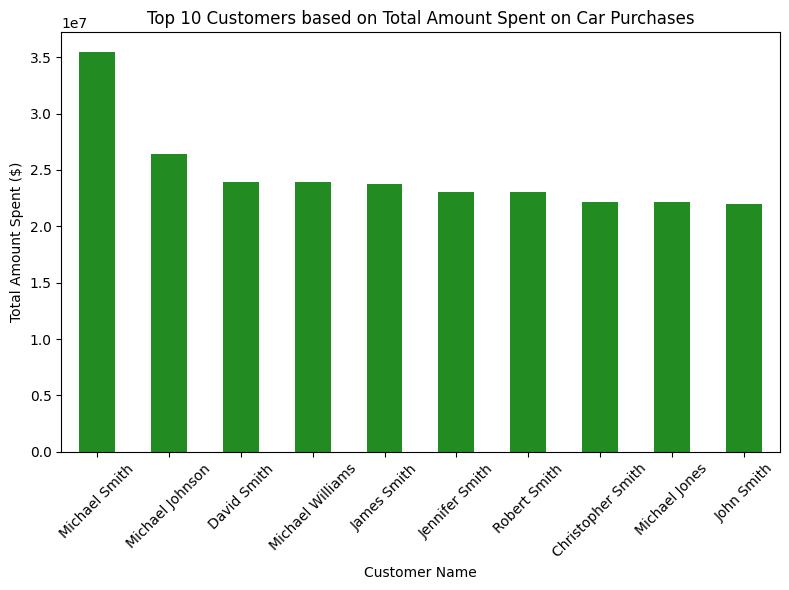

In [15]:
customer_spending = df.groupby('Customer Name')['Sale Price'].sum()
top_customers = customer_spending.sort_values(ascending=False).head(10) 
plt.figure(figsize=(8, 6))
top_customers.plot(kind='bar', color='forestgreen')
plt.title('Top 10 Customers based on Total Amount Spent on Car Purchases')
plt.xlabel('Customer Name')
plt.ylabel('Total Amount Spent ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

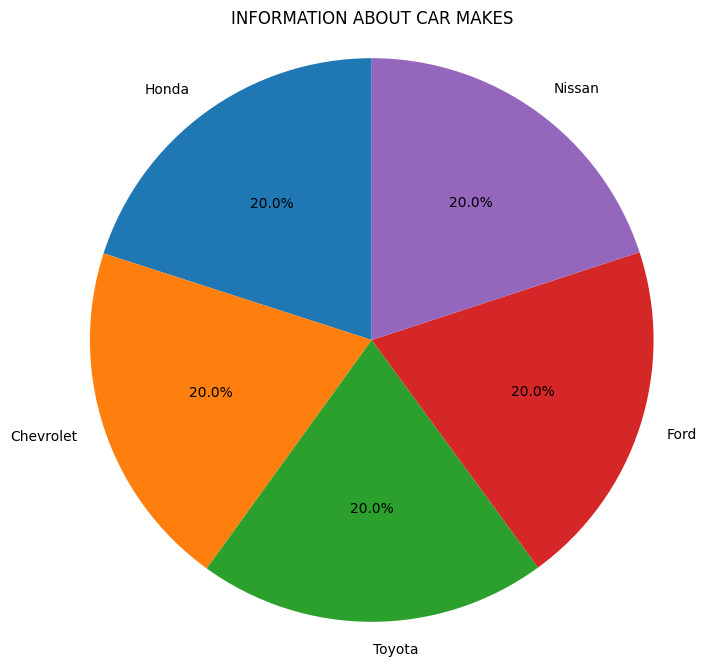

In [22]:
car_make_counts = df['Car Make'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(car_make_counts, labels=car_make_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('INFORMATION ABOUT CAR MAKES')
plt.show()

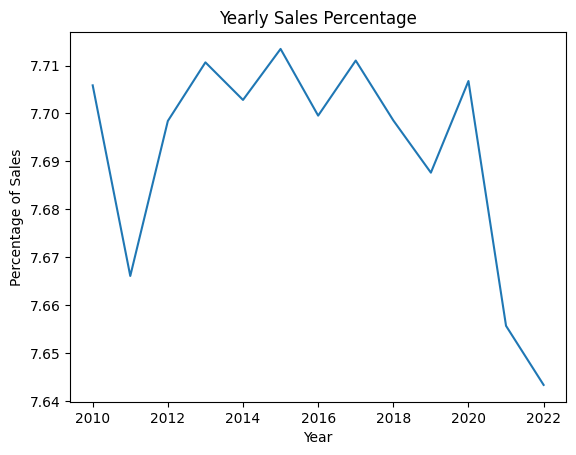

In [17]:
yearly_sales = df.groupby('Car Year')['Sale Price'].sum()
yearly_sales_perc = yearly_sales / yearly_sales.sum() * 100
plt.plot(yearly_sales_perc.index, yearly_sales_perc.values)
plt.xlabel('Year')
plt.ylabel('Percentage of Sales')
plt.title('Yearly Sales Percentage')
plt.show()

In [18]:
correlation = df['Car Year'].corr(df['Sale Price'])
print(correlation)

-0.0006665070424949119


In [21]:
yearly_sales = df.groupby('Car Year')['Sale Price'].sum().reset_index()
yearly_sales = yearly_sales.sort_values(by='Sale Price', ascending=False)
print(yearly_sales)

    Car Year  Sale Price
5       2015  5787448830
7       2017  5785627889
3       2013  5785345440
10      2020  5782422975
0       2010  5781746875
4       2014  5779464242
6       2016  5777008549
8       2018  5776261553
2       2012  5776172347
9       2019  5768079806
1       2011  5751909061
11      2021  5744104226
12      2022  5734855062


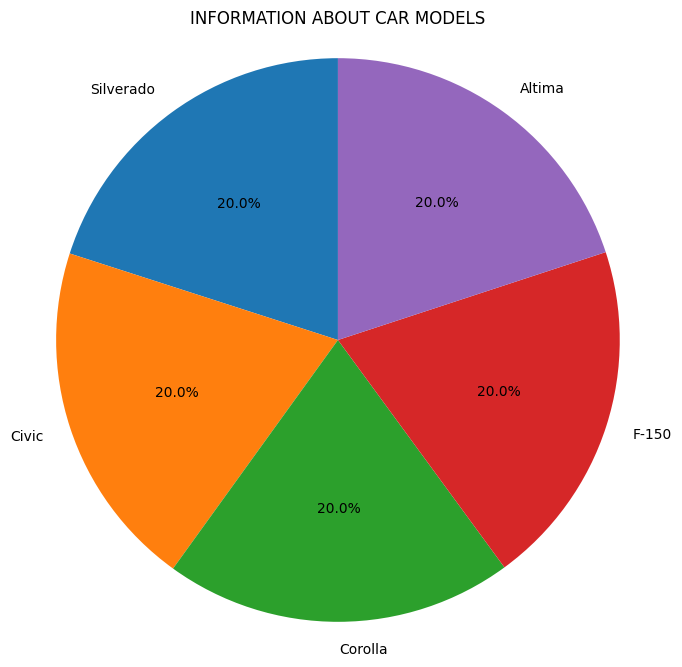

In [24]:
car_make_counts = df['Car Model'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(car_make_counts, labels=car_make_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('INFORMATION ABOUT CAR MODELS')
plt.show()

In [25]:
top_salespersons = df['Salesperson'].value_counts().head(5)
print(top_salespersons)

Salesperson
Michael Smith      1229
Michael Johnson     976
David Smith         821
James Smith         796
Jennifer Smith      753
Name: count, dtype: int64
